In [23]:
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline

In [28]:
# data is stored in the same directory as the notebook
data = pd.read_csv("AADF_Devon_VehicleFlows.csv", header = 0)

In [25]:
data["StartJunction"].isnull().sum()
data[data["StartJunction"].isnull()]

# need to drop these two values from  data

,AADFYear,CP,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,StartJunction,EndJunction,...,BusesCoaches,LightGoodsVehicles,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles
32,2000,16297,South West,Devon,A30,TR,310000,97900,NaN,NaN,...,89,2479,537,97,44,135,262,155,1230,22079
143,2000,56290,South West,Devon,A30,TR,308000,97200,NaN,NaN,...,49,2107,500,96,42,135,230,185,1188,20630


In [26]:
data = data.dropna()

In [27]:
data.count()

# now these should all be the same, down from 2450

AADFYear                3450
CP                      3450
Region                  3450
LocalAuthority          3450
Road                    3450
RoadCategory            3450
Easting                 3450
Northing                3450
StartJunction           3450
EndJunction             3450
LinkLength_km           3450
LinkLength_miles        3450
PedalCycles             3450
Motorcycles             3450
CarsTaxis               3450
BusesCoaches            3450
LightGoodsVehicles      3450
V2AxleRigidHGV          3450
V3AxleRigidHGV          3450
V4or5AxleRigidHGV       3450
V3or4AxleArticHGV       3450
V5AxleArticHGV          3450
V6orMoreAxleArticHGV    3450
AllHGVs                 3450
AllMotorVehicles        3450
dtype: int64

In [17]:
# group by year
group = data.groupby(['AADFYear'])

# make a new dataframe of a few columns of interest
data_group = group['PedalCycles','AllHGVs','AllMotorVehicles'].agg(['mean','std','count'])

In [18]:
print(data_group)

         PedalCycles                       AllHGVs                     \
                mean         std count        mean          std count   
AADFYear                                                                
2000       24.951327   42.064525   226  793.407080  1196.326460   226   
2001       26.372807   56.267036   228  799.394737  1207.978477   228   
2002       22.438596   42.575465   228  797.504386  1198.353036   228   
2003       25.478070   62.634204   228  762.043860  1088.149806   228   
2004       22.916667   54.950816   228  796.381579  1207.246454   228   
2005       20.780702   46.621781   228  792.890351  1195.698541   228   
2006       23.429825   47.421062   228  772.570175  1133.761439   228   
2007       18.580087   36.785055   231  783.160173  1197.491962   231   
2008       28.266094   71.541388   233  731.828326  1061.730663   233   
2009       29.030043   65.023894   233  660.025751   966.586778   233   
2010       29.369099   63.441877   233  655.347639 

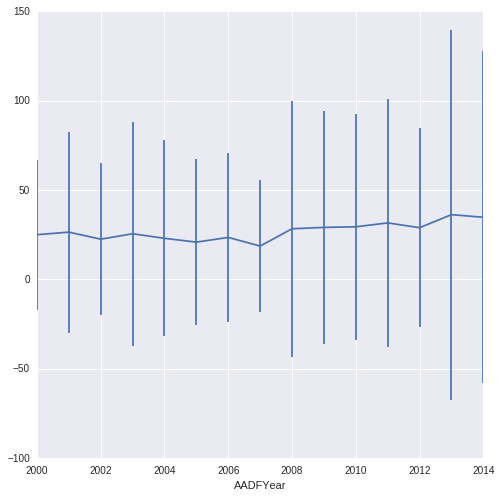

In [22]:
data_group.PedalCycles['mean'].plot(figsize=(8,8), yerr = data_group.PedalCycles['std'])

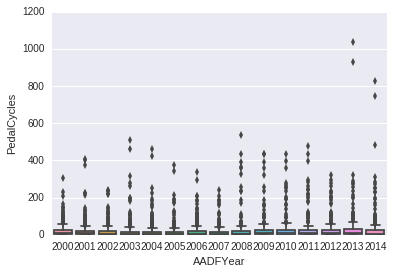

In [15]:
ax = sns.boxplot(x="AADFYear", y="PedalCycles", data=data)

In [38]:
# put all rows where cycling is 0 into a new dataframe for investigation

cycles_gt0 = data[data["PedalCycles"] > 0]
cycles_0 = data[data["PedalCycles"] == 0]
print(len(cycles_gt0))
print(len(cycles_0))

2953
499


In [42]:
print("roads which have had cycles on them since 2000 = \n", cycles_gt0["Road"].unique())
print("roads which at some point don't have any cylists = \n", cycles_0["Road"].unique())

roads which have had cycles on them since 2000 = 
 ['A379' 'A38' 'A39' 'A303' 'A358' 'A376' 'A380' 'A381' 'A382' 'A383' 'A385'
 'A386' 'A396' 'A3052' 'A3072' 'A388' 'A361' 'A3079' 'A30' 'A377' 'A35'
 'A3122' 'A384' 'A375' 'A3121' 'A3123' 'A373' 'A399' 'A3126' 'A3124'
 'A3125' 'A3015' 'A390']
roads which at some point don't have any cylists = 
 ['M5' 'A388' 'A35' 'A38' 'A361' 'A386' 'A30' 'A3072' 'A399' 'A377' 'A382'
 'A379' 'A380' 'A358' 'A39' 'A3124' 'A303' 'A3122' 'A3123' 'A373' 'A385']


In [58]:
unique_roads = data["CP"].unique()


cp_missing = []

for i,road in enumerate(unique_roads):
    years = len(data[data["CP"] == road])
    if years != 15:
        print(years)
        print("There are not 15 years worth of data at %s" %road)
        cp_missing.append(road)
    

12
There are not 15 years worth of data at 8528
1
There are not 15 years worth of data at 16297
1
There are not 15 years worth of data at 56290
7
There are not 15 years worth of data at 58308
8
There are not 15 years worth of data at 77947
12
There are not 15 years worth of data at 77956
14
There are not 15 years worth of data at 74556
14
There are not 15 years worth of data at 74557
8
There are not 15 years worth of data at 81066
8
There are not 15 years worth of data at 81067
8
There are not 15 years worth of data at 81068
8
There are not 15 years worth of data at 81069
7
There are not 15 years worth of data at 81187
7
There are not 15 years worth of data at 81188
7
There are not 15 years worth of data at 81189


In [51]:
# These are the stations with less than 15 years of data
print(cp_missing)

[8528, 16297, 56290, 58308, 77947, 77956, 74556, 74557, 81066, 81067, 81068, 81069, 81187, 81188, 81189]


In [57]:
# Which years are missing? Is it always the same and could there be a reason?
for missing in cp_missing:
    print ("----------------")
    print("CP = ", missing)
    print (data["AADFYear"][data["CP"] == missing])

----------------
CP =  8528
26      2000
254     2001
482     2002
710     2003
938     2004
1166    2005
1394    2006
1622    2007
1853    2008
2086    2009
2319    2010
2552    2011
Name: AADFYear, dtype: int64
----------------
CP =  16297
32    2000
Name: AADFYear, dtype: int64
----------------
CP =  56290
143    2000
Name: AADFYear, dtype: int64
----------------
CP =  58308
160     2000
386     2001
614     2002
842     2003
1070    2004
1298    2005
1526    2006
Name: AADFYear, dtype: int64
----------------
CP =  77947
188     2000
416     2001
644     2002
872     2003
1100    2004
1328    2005
1556    2006
1783    2007
Name: AADFYear, dtype: int64
----------------
CP =  77956
191     2000
419     2001
647     2002
875     2003
1103    2004
1331    2005
1559    2006
1786    2007
2016    2008
2249    2009
2482    2010
2715    2011
Name: AADFYear, dtype: int64
----------------
CP =  74556
400     2001
628     2002
856     2003
1084    2004
1312    2005
1540    2006
1767    2007
199